## Titanic

In [1]:
# Introducing the liberaries

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Reading the Data

In [2]:
df = pd.read_csv("Titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Data Exploration

In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# seperate the data into numeric and categorical
df_num = df[['Age','SibSp','Parch','Fare']]
df_cat = df[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

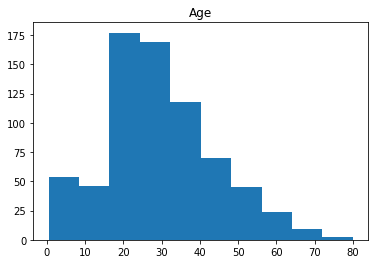

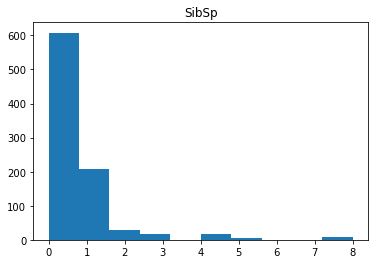

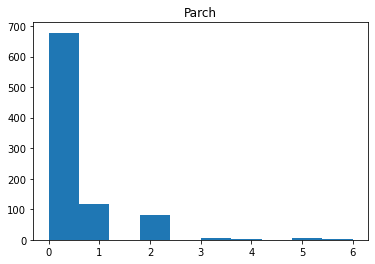

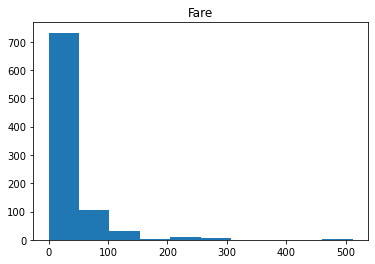

In [7]:
## Plotting the numerical data
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

### Correlation

In [8]:
df_num.corr()

,Age,SibSp,Parch,Fare
Age,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.308247,1.000000,0.414838,0.159651
Parch,-0.189119,0.414838,1.000000,0.216225
Fare,0.096067,0.159651,0.216225,1.000000


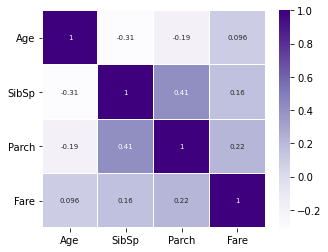

In [9]:
plt.figure(figsize=(5,4))
sns.heatmap(df_num.corr(),linewidths=.1,cmap="Purples", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);
plt.show()

Here we can see that Parch and SibSp has a higher correlation, which generally makes sense since Parents are more likely to travel with their multiple kids and spouses tend to travel together. Next, let us compare survival rates across the numeric variables. This might reveal some interesting insights:

In [10]:
pd.pivot_table(df, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


The inference we can draw from this table is:

 The average age of survivors is 28, so young people tend to survive more.
 People who paid higher fare rates were more likely to survive, more than double. This might be the people traveling in first-class. Thus the rich survived, which is kind of a sad story in this scenario.
 In the 3rd column, If you have parents, you had a higher chance of surviving. So the parents might’ve saved the kids before themselves, thus explaining the rates
 And if you are a child, and have siblings, you have less of a chance of surviving

In [11]:
## Similar for Categorical data
df_cat.corr()

,Survived,Pclass
Survived,1.000000,-0.338481
Pclass,-0.338481,1.000000


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


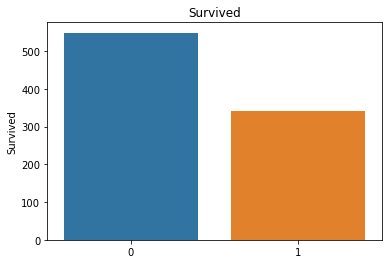

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


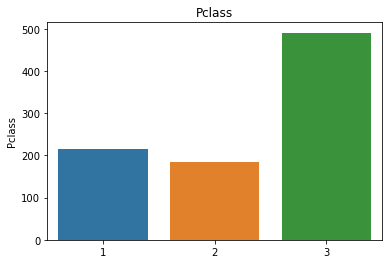

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


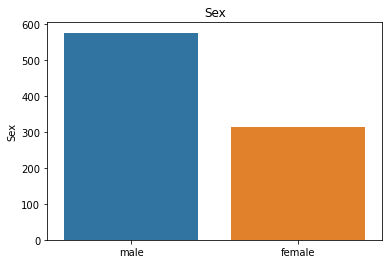

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


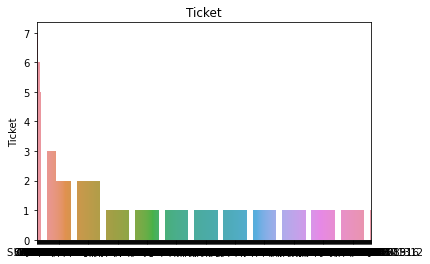

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


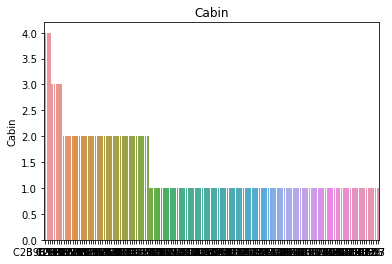

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


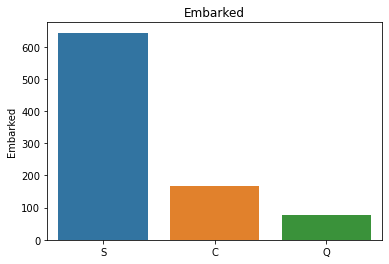

In [12]:
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()

The Ticket and Cabin graphs look very messy, we might have to feature engineer them! Other than that, the rest of the graphs tells us:

Survived: Most of the people died in the shipwreck,  only around 300 people survived.
Pclass: The majority of the people traveling, had tickets to the 3rd class.
Sex: There were more males than females aboard the ship, roughly double the amount.
Embarked: Most of the passengers boarded the ship from Southampton.

In [13]:
## Similarly making pivot for categorical data

In [14]:
print(pd.pivot_table(df, index = 'Survived', columns = 'Pclass',
                     values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(df, index = 'Survived', columns = 'Sex', 
                     values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(df, index = 'Survived', columns = 'Embarked', 
                     values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


Pclass: Here we can see a lot more people survived from the First class than the Second or the Third class, even though the total number of passengers in the First class was much much less than the Third class. Thus our previous assumption that the rich survived is confirmed here, which might be relevant to model building.
Sex: Most of the women survived, and the majority of the male died in the shipwreck. So it looks like the saying “Woman and children first” actually applied in this scenario.
Embarked: This doesn’t seem much relevant, maybe if someone was from “Cherbourg” had a higher chance of surviving.

In [15]:
### Feature Engineering
char_cabin = df['Cabin'].astype(str)
new_cabin = np.array([cabin[0] for cabin in char_cabin])
new_cabin = pd.Categorical(new_cabin)
new_cabin.describe()

,counts,freqs
categories,,
A,15,0.016835
B,47,0.052750
C,59,0.066218
D,33,0.037037
E,32,0.035915
F,13,0.014590
G,4,0.004489
T,1,0.001122
n,687,0.771044


In [16]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
### Dropping Cabin as not required to check the Survival of the passengers and filling NA in Age and Embarked

In [18]:
df.drop(columns ='Cabin',axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [19]:
df['Age'].fillna(df['Age'].mean(),inplace = True)

In [20]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace = True)

In [21]:
df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}},inplace = True)

### Transformation

In [22]:
df = df.astype('category')
df.dtypes

PassengerId    category
Survived       category
Pclass         category
Name           category
Sex            category
Age            category
SibSp          category
Parch          category
Ticket         category
Fare           category
Cabin          category
Embarked       category
dtype: object

In [23]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

### Spliting the Data

In [24]:
x = df.drop(columns = ['PassengerId','Name','Ticket','Cabin','Survived'],axis=1)
y = df['Survived']

### Training the Data

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=41)

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

### Model Deployment

1. Logical Regression

In [27]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.8041958  0.73426573 0.78873239 0.83098592 0.82394366]
0.7964247020585049


In [28]:
lr = LogisticRegression(solver="lbfgs", max_iter=500)
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
print("Logistic Regression Classifier report: \n\n", classification_report(y_test, y_pred_lr))
print("Test Accuracy: {}%".format(round(lr.score(x_test, y_test)*100,2)))

Logistic Regression Classifier report: 

               precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Test Accuracy: 81.01%


2. K Nearest Neighbour

In [29]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.67832168 0.67132867 0.69014085 0.67605634 0.73239437]
0.6896483797892248


In [30]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train) 
y_pred = knn.predict(x_test)
print("K Neighbour Classifier report: \n\n", classification_report(y_test, y_pred))
print("Test Accuracy: {}%".format(round(knn.score(x_test, y_test)*100, 2)))

K Neighbour Classifier report: 

               precision    recall  f1-score   support

           0       0.73      0.80      0.76       105
           1       0.67      0.58      0.62        74

    accuracy                           0.71       179
   macro avg       0.70      0.69      0.69       179
weighted avg       0.71      0.71      0.71       179

Test Accuracy: 70.95%


3. Support Vector Classifier

In [31]:
svc = SVC(probability = True)
cv = cross_val_score(svc,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.61538462 0.67832168 0.65492958 0.74647887 0.66901408]
0.6728257657835123


In [32]:
svc = SVC()
svc.fit(x_train,y_train) 
y_pred = svc.predict(x_test)
print("Support Vector Classifier report: \n\n", classification_report(y_test, y_pred))
print("Test Accuracy: {}%".format(round(svc.score(x_test, y_test)*100, 2)))

Support Vector Classifier report: 

               precision    recall  f1-score   support

           0       0.65      0.92      0.76       105
           1       0.72      0.28      0.41        74

    accuracy                           0.66       179
   macro avg       0.69      0.60      0.58       179
weighted avg       0.68      0.66      0.61       179

Test Accuracy: 65.92%


4. Decision Tree

In [33]:
dt = DecisionTreeClassifier()
cv = cross_val_score(svc,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.61538462 0.67832168 0.65492958 0.74647887 0.66901408]
0.6728257657835123


In [34]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train) 
y_pred = dt.predict(x_test)
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred))
print("Test Accuracy: {}%".format(round(dt.score(x_test, y_test)*100, 2)))

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       0.81      0.87      0.83       105
           1       0.79      0.70      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

Test Accuracy: 79.89%


5. Random Forest Classfication

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
print("Random Forest Classifier report: \n\n", classification_report(y_test, y_pred_rf))
print("Test Accuracy: {}%".format(round(rf.score(x_test, y_test)*100, 2)))

Random Forest Classifier report: 

               precision    recall  f1-score   support

           0       0.79      0.90      0.84       105
           1       0.82      0.66      0.73        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.79       179

Test Accuracy: 79.89%


In [36]:
cv = cross_val_score(rf,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.8041958  0.77622378 0.8028169  0.80985915 0.82394366]
0.803407859745888


##### Therefore the best results are given by Logistice Regression with 81.01%

### Conclusion

In [37]:
import numpy as np
a = np.array(y_test)
predicted=np.array(lr.predict(x_test))
df_com = pd.DataFrame({'Original':a,'Predicted':predicted})
df_com

,Original,Predicted
0,0,0
1,0,0
2,1,1
3,0,0
4,0,1
...,...,...
174,1,1
175,0,0
176,0,0
177,1,1


### Prediction

In [39]:
input_data = (3,0,35,0,0,8.05,0)  # Note that these datas exclude the Survived data, as it is to be determined from the model itself
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = df.predict(input_data_reshaped)
#print(prediction)
if prediction[0]==0:
    print("Dead")
if prediction[0]==1:
    print("Alive")

AttributeError: 'DataFrame' object has no attribute 'predict'

### ROC AUC Curve

In [ ]:
# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(y_test, lr.predict_proba(x_test)[:,1])

# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Saving the File

In [44]:
import pickle
filename = 'Titanic.pkl'
pickle.dump(lr,open(filename,'wb'))